<b>Data Storytelling</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned.csv')

My capstone project will investigate the factors that affect the likelihoood that an attempted terrorist attack will succeed. I will start by showing some general trends in terrorist attacks. 

First, here is the number of attacks by year:

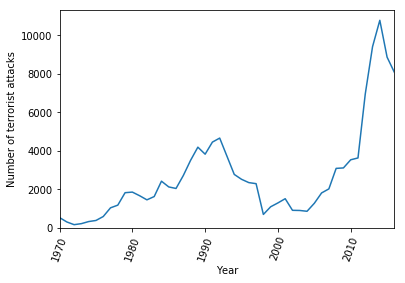

In [2]:
year_counts = df.groupby(['iyear'])['iyear'].count()

_ = year_counts.plot(kind='line', rot = 70)
_ = plt.ylim(ymin = 0)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of terrorist attacks')
plt.show()

As this plot shows, there is a spike in terrorist attacks in the late 1980s and early 1990s in this dataset, and a larger spike occurring after 2010. The large, recent spike may be caused by better reporting leading to a higher proportion of actual terrorist attacks being listed in the dataset, or geopolitical trends such as instability in the Middle East leading to an actual spike in attacks. Thus, I will now analyze the breakdown in attacks by year and region:

In [3]:
region_dict = {1: 'North America', 2: 'Central America', 3: 'South America', 4: 'East Asia', 5: 'SE Asia', 6: 'South Asia', 
7: 'Central Asia', 8: 'West Europe',9: 'East Europe',10: 'ME and North Africa', 
11: 'Sub-Saharan Africa', 12: 'Oceania'}

df['region_name'] = df['region'].replace(region_dict)

region_counts = df.groupby(['region_name'])['success'].count()
print(region_counts.sort_values())

#improve readability by restricting to regions with the highest number of attacks
highcount_regions = [2, 5, 11, 8, 3, 6, 10]
regionyear_df = df.loc[df['region'].isin(highcount_regions)]

region_name
Oceania                  223
Central Asia             460
East Asia                668
North America           2988
East Europe             3496
Central America         7024
SE Asia                 8978
Sub-Saharan Africa      9751
West Europe            12517
South America          14745
South Asia             30567
ME and North Africa    30959
Name: success, dtype: int64


The Middle East and North Africa, South Asia, and South America are the regions with the largest number of attacks in the dataset. Now I will use a stacked area chart to show the trends over time for several regions:

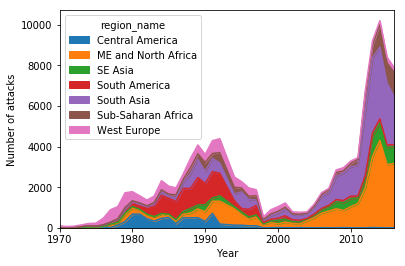

In [4]:
regionyear_df = regionyear_df.groupby(['iyear', 'region_name'])['region'].count().reset_index()
regionyear_df = regionyear_df.pivot(index = 'iyear', columns = 'region_name', values = 'region')
#print(regionyear_df)

_ = regionyear_df.plot.area()
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of attacks')
plt.show()

As this plot shows, there are clear differences in the distribution of attacks by region over time. South Asia and the Middle East and North Africa appear to be the main contributors to the recent spike in attacks. South America and Western Europe have seen large declines in both the absolute number of attacks, and their share in the world total, over time. Because the spike in attacks is not uniform by region, this suggests that the 2010s spike was likely caused, at least in part, by changes in political situation in addition to differences in reporting or measurement.

Next, I will use exploratory data analysis to investigate how success rate varies based on several variables. In this dataset, whether an attack succeeds is based on whether the attack occurs and leads to tangible effects, but does not depend on whether it achieves the long-term goals of the attack. For example, a bombing succeeds if the bomb detonates, though the broader societal affect of the detonation may vary from attack to attck. 

First, I show the success rate grouped by region:

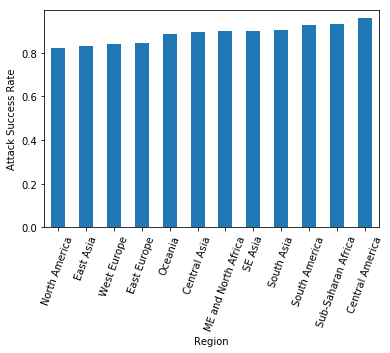

In [5]:
region_success_counts = df.groupby(['region_name'])['success'].sum()
region_counts = df.groupby(['region_name'])['success'].count()
region_success_ratio = region_success_counts.divide(region_counts)
region_success_ratio = region_success_ratio.sort_values()

_ = region_success_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Success Rate')
plt.margins(0.04)
plt.show()

As the graph shows, there is some difference in success rate by region, but the success rate does not vary too much. Next, I break down success rate by whether the terrorist attack was carried out by an individual (as opposed to a group or organization):

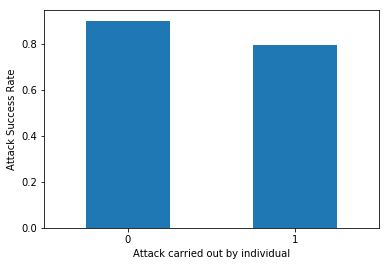

In [6]:
individual_counts = df.groupby(['individual'])['success'].count()
individual_success_counts = df.groupby(['individual'])['success'].sum()
individual_success_ratio = individual_success_counts.divide(individual_counts)

_ = individual_success_ratio.plot(kind='bar', rot = 0)
_ = plt.xlabel('Attack carried out by individual')
_ = plt.ylabel('Attack Success Rate')
plt.show()

The plot shows that individual attacks have a lower success rate. Here is attack success rate grouped by weapon type:

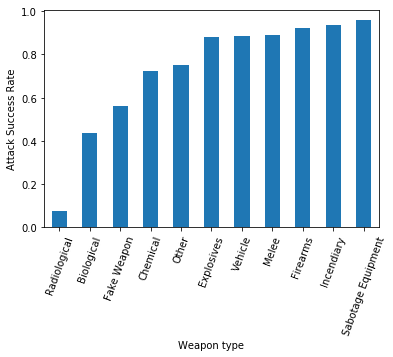

In [7]:
weapon_dict = {1:'Biological',2:'Chemical',3:'Radiological',
            4:'Nuclear',5:'Firearms',6:'Explosives',
            7:'Fake Weapon', 8:'Incendiary', 9:'Melee',
            10:'Vehicle',11:'Sabotage Equipment', 12:'Other'}

df['weapname1'] = df['weaptype1'].replace(weapon_dict)

weap_counts = df.groupby(['weapname1'])['success'].count()
weap_success_counts = df.groupby(['weapname1'])['success'].sum()
weap_success_ratio = weap_success_counts.divide(weap_counts)
weap_success_ratio = weap_success_ratio.sort_values()

_ = weap_success_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Weapon type')
_ = plt.ylabel('Attack Success Rate')
plt.show()

Some weapon types feature much lower success rates than the others. Radiological attacks rarely succeed, while attacks with sabotage equipment, incendiary weapons, and firearms usually succeed. Next, I show attack success rate grouped by attack type:

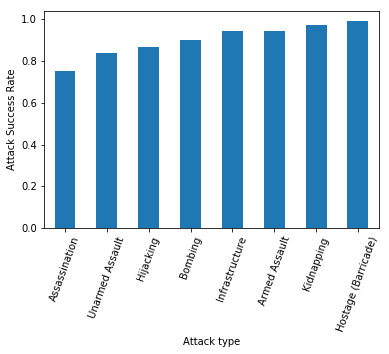

In [8]:
type_dict = {1:'Assassination', 2:'Armed Assault',
            3:'Bombing', 4:'Hijacking', 5:'Hostage (Barricade)',
             6:'Kidnapping', 7:'Infrastructure', 8:'Unarmed Assault'}

df['typename1'] = df['attacktype1'].replace(type_dict)

type_counts = df.groupby(['typename1'])['success'].count()
type_success_counts = df.groupby(['typename1'])['success'].sum()
type_success_ratio = type_success_counts.divide(type_counts)

type_success_ratio = type_success_ratio.sort_values()

_ = type_success_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Attack type')
_ = plt.ylabel('Attack Success Rate')
plt.show()

Assassinations are less successful than other types of attacks, while kidnappings and hostage attacks are usually successful. This may result in assassination being more difficult- an assassination must lead to the death of the intended target to be marked as a success in the dataset.

Now that I have explored success rates, I will investigate the effects of these attacks. First, I will look at the distribution of casualties from terrorist attacks:

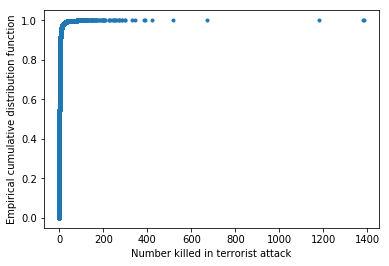

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(df['nkill'])

_ = plt.plot(x,y, linestyle = 'none', marker = '.')
_ = plt.xlabel('Number killed in terrorist attack')
_ = plt.ylabel('Empirical cumulative distribution function')
plt.show()

The data is right-skewed and a few outliers make this graph hard to read. We can focus on attacks with a lower casualty count (< 100) to get a better idea of the distribution:

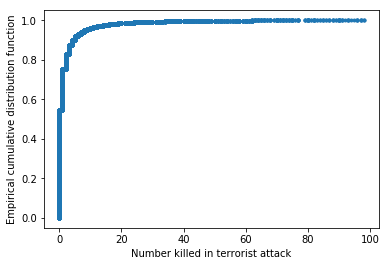

In [10]:
df2 = df[df['nkill'] < 100]

x, y = ecdf(df2['nkill'])

_ = plt.plot(x,y, linestyle = 'none', marker = '.')
_ = plt.xlabel('Number killed in terrorist attack')
_ = plt.ylabel('Empirical cumulative distribution function')
plt.show()

The plot shows that a large proportion (perhaps half) of attacks lead to 0 fatalities, and a large majority lead to fewer than 10 fatalities. Since the overall success rate is over 80%, this shows that a good number of successful terrorist attacks lead to no fatalities, or at least few fatalities. The terrorist attacks with high death counts that are covered in the media are not representative of terrorist attacks overall.

Next, I will explore which factors determine whether an attack will lead to a fatality. Here are attacks grouped by region:

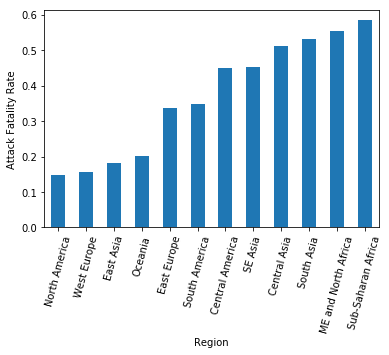

In [11]:
df['fatal'] = df['nkill'] > 0
region_fatal_counts = df.groupby(['region_name'])['fatal'].sum()
region_fatal_ratio = region_fatal_counts.divide(region_counts)
region_fatal_ratio = region_fatal_ratio.sort_values()

_ = region_fatal_ratio.plot(kind='bar', rot = 75)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

The ranking of the regions is similar to the plot for success rate. However, the fatality rates differ largely by region. Most attacks lead to fatalities in Africa and the Middle East, while most attacks do not lead to fatalities in North America, Western Europe, and East Asia. There appears to be a relationship between the economic success and political stability of a region and a low fatality rate of attacks.

Next, I show the fatality rate of attacks grouped by whether the perpetrator was an individual.

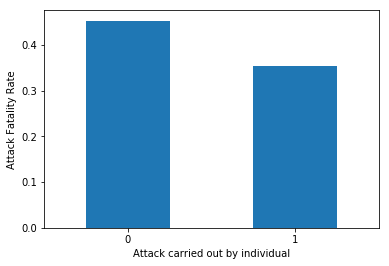

In [12]:
individual_counts = df.groupby(['individual'])['fatal'].count()
individual_fatal_counts = df.groupby(['individual'])['fatal'].sum()
individual_fatal_ratio = individual_fatal_counts.divide(individual_counts)

_ = individual_fatal_ratio.plot(kind='bar', rot = 0)
_ = plt.xlabel('Attack carried out by individual')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

Attacks carried out by individuals have a lower fatality rate. Next, I show the fatality rate of attacks grouped by weapon type:

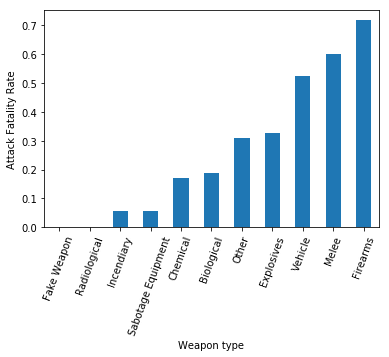

In [13]:
weap_counts = df.groupby(['weapname1'])['fatal'].count()
weap_fatal_counts = df.groupby(['weapname1'])['fatal'].sum()
weap_fatal_ratio = weap_fatal_counts.divide(weap_counts)
weap_fatal_ratio = weap_fatal_ratio.sort_values()

_ = weap_fatal_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Weapon type')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

This plot shows large differences in fatality rates between weapon types. Perhaps unsurprisingly, firearms have a relatively high fatality rate. Attacks using fake weapons and radiological weapons do not lead to any fatalities in this data set.

Next, I show fatality rate based on attack type:

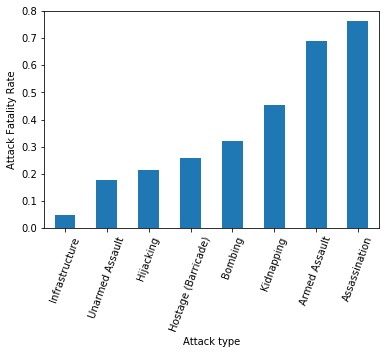

In [14]:
type_counts = df.groupby(['typename1'])['fatal'].count()
type_fatal_counts = df.groupby(['typename1'])['fatal'].sum()
type_fatal_ratio = type_fatal_counts.divide(type_counts)

type_fatal_ratio = type_fatal_ratio.sort_values()

_ = type_fatal_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Attack type')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

There are large differences in fatality rate based on attack type, in fairly predictable ways. Most assassinations and armed assaults lead to fatalities. Most infrastructure attacks and unarmed assaults do not lead to any deaths.

Next, I will look at whether there is a relationship between number of deaths and the number wounded in attacks:

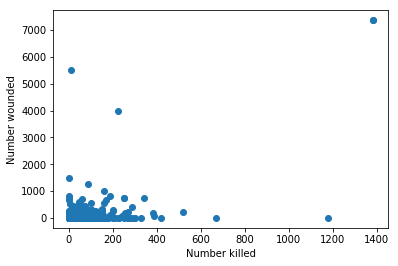

In [15]:
#_ = df.plot.scatter(df['nkill'], df['nwound'])

_ = plt.scatter(df['nkill'],  df['nwound'])
_ = plt.xlabel('Number killed')
_ = plt.ylabel('Number wounded')
plt.show()

This scatter plot is difficult to read. For a more detailed look, I'll remove a few outliers:

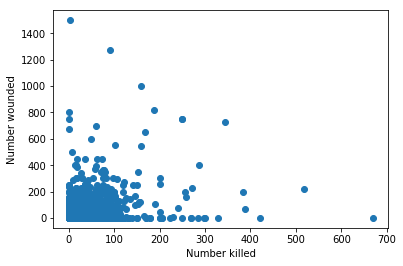

In [16]:
df3 = df[df['nkill'] < 1000]# & df['nwound'] < 3000]
df3 = df3[df3['nwound'] < 3000]

#_ = df.plot.scatter(df['nkill'], df['nwound'])

_ = plt.scatter(df3['nkill'],  df3['nwound'])
_ = plt.xlabel('Number killed')
_ = plt.ylabel('Number wounded')
plt.show()

In [17]:
np.corrcoef(df3['nkill'], df3['nwound'])[0,1]

0.40848621263230955

There is a moderate, positive correlation between the number killed and the number wounded in terrorist attacks.